C1. Classification

Classification: Classification is to identify which category a new observation belongs to, based on a training dataset. There are five datasets. For each dataset, we provide the training dataset, training label, and test dataset. Please use the training dataset and training label to build your classifier and predict the test label. A class label is represented by an integer. For example, in the 1st dataset, there are 4 classes where 1 represents the 1st class, 2 represents the 2nd class, etc. Note that, there exist some missing values in some of the dataset (a missing entry is filled by 1.00000000000000e+99), please fill the missing values before perform your classification algorithm.

Sample Data:

Training data:

1.1	2.1	2.1	5.2
2.1	2.4	2.4	2.1
3.1	1.5	2.6	1.5
Training label

1
1
2
Test data

3.1	2.2	1.5	2.5
2.1	2.1	2.1	2.6

Please use the training data and training label to predict the test label. For example, if your prediction for the test sample is 1, 2. That is, the first sample in the test dataset (first row) is predicted as 1 and second as 2. Then please return me the test result of each dataset as an individual files.

1
2


### Dataset 1: 
TrainData 1 contains 3312 features with 150 samples. Testdata1 contains 3312 features with 53 samples. There are 5 classes in this dataset.


### Dataset 2: 
TrainData 2 contains 9182 features with 100 samples. Testdata2 contains 9182 features with 74 samples. There are 11 classes in this dataset.

### Dataset 3: 
TrainData 3 contains 13  features with 6300 samples. Testdata3 contains 13 features with 2693 samples. There are 9 classes in this dataset.

### Dataset 4: 
TrainData 4 contains 112 features with 2547 samples. Testdata4 contains 112 features with 1092 samples. There are 9 classes in this dataset.

### Dataset 5: 
TrainData 5 contains 11 features with 1119 samples. Testdata5 contains 11 features with 480 samples. There are 6 classes in this dataset.

Processing classification for TrainData1.txt
Data shape: (150, 3312), Labels shape: (150, 1), Test shape: (53, 3312)
Random Forest Accuracy: 100.00%
MLP Classifier Accuracy: 100.00%
Processing classification for TrainData2.txt
Data shape: (100, 9182), Labels shape: (100, 1), Test shape: (74, 9182)
Random Forest Accuracy: 100.00%
MLP Classifier Accuracy: 100.00%
Processing classification for TrainData3.txt
Data shape: (6300, 13), Labels shape: (6300, 1), Test shape: (2693, 13)
Random Forest Accuracy: 91.67%
MLP Classifier Accuracy: 41.25%
Processing classification for TrainData4.txt
Data shape: (2547, 112), Labels shape: (2548, 1), Test shape: (1092, 112)
Random Forest Accuracy: 100.00%
MLP Classifier Accuracy: 99.96%
Processing classification for TrainData5.txt
Data shape: (1119, 11), Labels shape: (1120, 1), Test shape: (480, 11)
Random Forest Accuracy: 100.00%
MLP Classifier Accuracy: 65.68%
Dataset: TrainData1.txt, Best Model: Random Forest, Accuracy: 100.00%
Dataset: TrainData2.txt

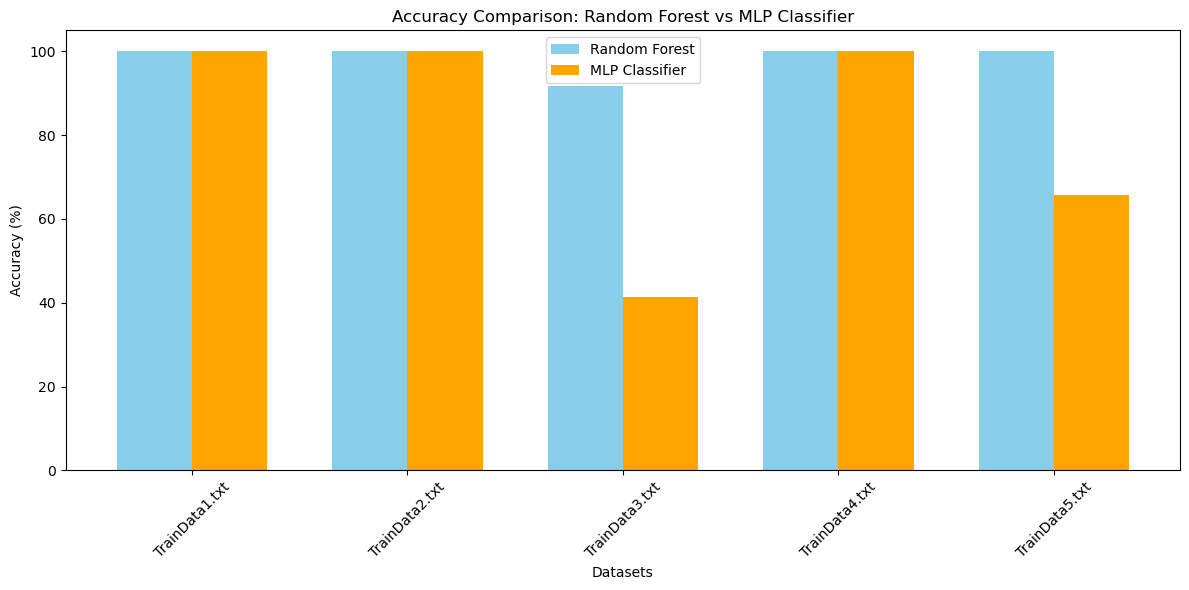

In [23]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to clean and preprocess data
def preprocess_data(file_path):
    try:
        # Read data, handle incorrect delimiters
        with open(file_path, 'r') as f:
            lines = f.readlines()

        # Detect and correct improperly delimited rows
        corrected_lines = [line.replace(',', ' ') for line in lines]
        data = pd.DataFrame([list(map(float, line.split())) for line in corrected_lines])
        return data
    except Exception as e:
        raise ValueError(f"Error processing {file_path}: {e}")

# Function for classification
def run_classification(train_data, train_label, test_data, output_file, results):
    try:
        print(f"Processing classification for {train_data}")
        data = preprocess_data(train_data)
        labels = preprocess_data(train_label)
        test = preprocess_data(test_data)

        print(f"Data shape: {data.shape}, Labels shape: {labels.shape}, Test shape: {test.shape}")

        # Align rows for mismatched data and labels
        min_rows = min(data.shape[0], labels.shape[0])
        data = data.iloc[:min_rows, :]
        labels = labels.iloc[:min_rows, :]

        # Replace missing values
        data.replace(1.00000000000000e+99, np.nan, inplace=True)
        test.replace(1.00000000000000e+99, np.nan, inplace=True)

        imputer = KNNImputer(n_neighbors=5)
        X_train = imputer.fit_transform(data)
        X_test = imputer.transform(test)

        if np.isnan(X_train).any() or np.isnan(X_test).any():
            raise ValueError("Imputation failed: There are still NaN values in the data.")

        # Normalize data
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        y_train = labels.values.ravel()

        # Initialize classifiers
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        mlp_model = MLPClassifier(max_iter=1000, random_state=42)

        # Train classifiers
        rf_model.fit(X_train, y_train)
        mlp_model.fit(X_train, y_train)

        # Predictions
        rf_pred = rf_model.predict(X_test)
        mlp_pred = mlp_model.predict(X_test)

        # Calculate accuracies
        rf_accuracy = accuracy_score(y_train, rf_model.predict(X_train)) * 100
        mlp_accuracy = accuracy_score(y_train, mlp_model.predict(X_train)) * 100

        print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
        print(f"MLP Classifier Accuracy: {mlp_accuracy:.2f}%")

        # Save predictions of the best model
        if rf_accuracy >= mlp_accuracy:
            np.savetxt(output_file, rf_pred, fmt='%d', header="Best Model: Random Forest", comments='')
            results.append({'Dataset': train_data, 'Random Forest Accuracy': rf_accuracy, 'MLP Accuracy': mlp_accuracy, 'Best Model': 'Random Forest', 'Best Accuracy': rf_accuracy})
        else:
            np.savetxt(output_file, mlp_pred, fmt='%d', header="Best Model: MLP Classifier", comments='')
            results.append({'Dataset': train_data, 'Random Forest Accuracy': rf_accuracy, 'MLP Accuracy': mlp_accuracy, 'Best Model': 'MLP Classifier', 'Best Accuracy': mlp_accuracy})

    except Exception as e:
        print(f"Error processing {train_data}: {e}")

# Store results for classification
classification_results = []

# Run classification on datasets
datasets = [
    ("TrainData1.txt", "TrainLabel1.txt", "TestData1.txt", "SakhamuriClassification1.txt"),
    ("TrainData2.txt", "TrainLabel2.txt", "TestData2.txt", "SakhamuriClassification2.txt"),
    ("TrainData3.txt", "TrainLabel3.txt", "TestData3.txt", "SakhamuriClassification3.txt"),
    ("TrainData4.txt", "TrainLabel4.txt", "TestData4.txt", "SakhamuriClassification4.txt"),
    ("TrainData5.txt", "TrainLabel5.txt", "TestData5.txt", "SakhamuriClassification5.txt"),
]

for train_data, train_label, test_data, output_file in datasets:
    run_classification(train_data, train_label, test_data, output_file, classification_results)

# Print results
for result in classification_results:
    print(f"Dataset: {result['Dataset']}, Best Model: {result['Best Model']}, Accuracy: {result['Best Accuracy']:.2f}%")

# Visualization: Accuracy Comparison
datasets = [result['Dataset'] for result in classification_results]
rf_accuracies = [result['Random Forest Accuracy'] for result in classification_results]
mlp_accuracies = [result['MLP Accuracy'] for result in classification_results]

plt.figure(figsize=(12, 6))

# Bar plot for RF and MLP accuracies
x = np.arange(len(datasets))
width = 0.35

plt.bar(x - width/2, rf_accuracies, width, label="Random Forest", color="skyblue")
plt.bar(x + width/2, mlp_accuracies, width, label="MLP Classifier", color="orange")

# Add titles and labels
plt.xlabel("Datasets")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison: Random Forest vs MLP Classifier")
plt.xticks(x, datasets, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Dataset 6: 
TrainData 6 contains 142 features with 612 samples. Testdata6 contains 142 features with 262 samples. This is not a classification problem. You are asked to predict the real value.

Random Forest Regressor MAE: 399259.75, R2: 0.93
Gradient Boosting Regressor MAE: 466090.11, R2: 0.92

Best Model has higher R² and lower MAE: Random Forest Regressor with MAE: 399259.75, R2: 0.93
Predictions saved to SakhamuriClassification6_RF_GBR.txt


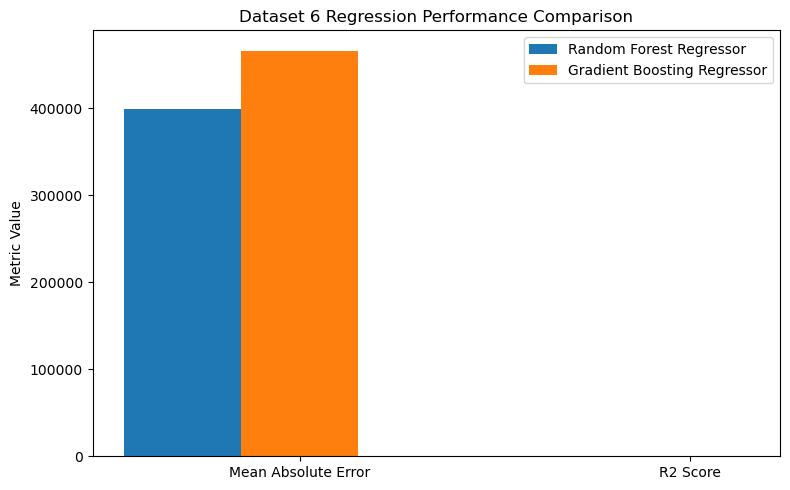

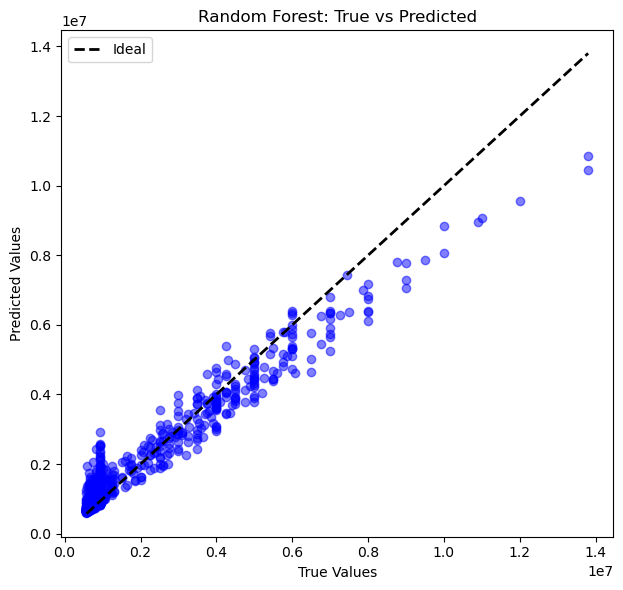

In [19]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# File Paths
train_data = "TrainData6.txt"
train_label = "TrainLabel6.txt"
test_data = "TestData6.txt"
test_pred = "SakhamuriClassification6_RF_GBR.txt"

# Read data
data = pd.read_table(train_data, sep='\s+', header=None)
labels = pd.read_table(train_label, sep='\s+', header=None)
test = pd.read_table(test_data, sep='\s+', header=None)

# Preprocessing
X_train = data.values
X_test = test.values
y_train = labels.values.ravel()

# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_train_pred = gbr_model.predict(X_train)
gbr_test_pred = gbr_model.predict(X_test)

# Evaluate Performance
models = {
    "Random Forest Regressor": (rf_train_pred, rf_model),
    "Gradient Boosting Regressor": (gbr_train_pred, gbr_model),
}

results = {}

for model_name, (train_pred, model) in models.items():
    mae = mean_absolute_error(y_train, train_pred)
    r2 = r2_score(y_train, train_pred)
    results[model_name] = {"MAE": mae, "R2": r2}
    print(f"{model_name} MAE: {mae:.2f}, R2: {r2:.2f}")

# Identify the best model
best_model_name = min(results, key=lambda x: results[x]["MAE"])
print(f"\nBest Model has higher R² and lower MAE: {best_model_name} with MAE: {results[best_model_name]['MAE']:.2f}, R2: {results[best_model_name]['R2']:.2f}")

# Save Predictions
np.savetxt(
    test_pred,
    np.column_stack((rf_test_pred, gbr_test_pred)),
    header="RandomForest GradientBoosting",
    comments="",
    fmt="%.6f",
    delimiter="\t",
)

print(f"Predictions saved to {test_pred}")

# Visualization
metrics = ["Mean Absolute Error", "R2 Score"]
x = range(len(metrics))

# Plot bars
plt.figure(figsize=(8, 5))
for i, (model_name, metrics_dict) in enumerate(results.items()):
    values = [metrics_dict["MAE"], metrics_dict["R2"]]
    plt.bar([p + i * 0.3 for p in x], values, width=0.3, label=model_name)

# Add labels and legend
plt.xticks([p + 0.3 for p in x], metrics)
plt.ylabel("Metric Value")
plt.title("Dataset 6 Regression Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()
# Visualization: True vs. Predicted Values
plt.figure(figsize=(12, 6))

# Plot for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_train, rf_train_pred, color="blue", alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: True vs Predicted")
plt.legend()


plt.tight_layout()
plt.show()
